<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib,
# although this botebook tries to only use plotly.
%matplotlib inline                
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

## Crack growth analysis

### Hollow cylinder with crack on the external surface 

In [2]:
# Standard imports
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import pandas as pd
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
import py_fatigue.testing as test
# Paths of this tutorial and of the data
TUTORIAL_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(TUTORIAL_PATH, "Data")
if not TUTORIAL_PATH in sys.path:
    sys.path.append(TUTORIAL_PATH)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
print(f"Platform: {platform.platform()}")
print(f"Python version: {sys.version}")
print(f"py-fatigue version: {pf.styling.TermColors.CBOLD}{pf.__version__}")

print(f"{pf.styling.TermColors.CWHITEBG}\
{pf.styling.TermColors.CBOLD}\
{pf.styling.TermColors.CBLUE}")
      
print(f"DATA_PATH = {DATA_PATH}")
print(f"TUTORIAL_PATH = {TUTORIAL_PATH}")

print(f"{pf.styling.TermColors.CEND}")

Platform: Linux-6.8.0-52-generic-x86_64-with-glibc2.2.5
Python version: 3.8.15 (default, Nov  6 2022, 02:12:40) 
[Clang 14.0.3 ]
py-fatigue version: 1.2.1

DATA_PATH = /home/pietro.dantuono@24SEA.local/Projects/MAXWind/py_fatigue/Data
TUTORIAL_PATH = /home/pietro.dantuono@24SEA.local/Projects/MAXWind/py_fatigue



In [4]:
plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["font.family"] = ["serif"]
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True

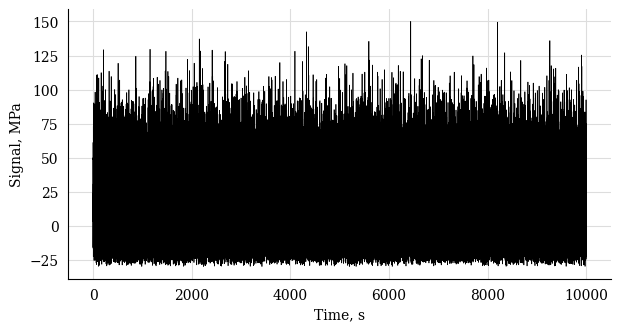

In [5]:

# Simulate a random signal
t = test.get_sampled_time(duration=10000, fs=10)
s = test.get_random_data(
    t=t, min_=-30, range_=180, random_type="weibull", a=2., seed=42
)
# Plot the signal
plt.plot(t, s, 'k', lw=0.5)
plt.xlabel("Time, s")
plt.ylabel("Signal, MPa")
plt.show()


In [6]:
# CycleCount definition
cycle_count = pf.CycleCount.from_timeseries(
    time=t, data=s, mean_bin_width=3., range_bin_width=3.,
)
cycle_count

,None
Cycle counting object,
"largest full stress range, MPa",179.026964
"largest stress range, MPa",180.0
number of full cycles,33317
number of residuals,23
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [7]:
exp_dict_legacy = cycle_count.as_dict(
    max_consecutive_zeros=20, damage_tolerance_for_binning=0.2, legacy_export=True
)
print(exp_dict_legacy)

{'nr_small_cycles': 99, 'range_bin_lower_bound': 0.2, 'range_bin_width': 3.0, 'hist': [1346.0, 1485.0, 1433.0, 1397.0, 1455.0, 1493.0, 1479.0, 1471.0, 1348.0, 1432.0, 1361.0, 1234.0, 1236.0, 1203.0, 1146.0, 1103.0, 1072.0, 983.0, 957.0, 853.0, 808.0, 806.0, 679.0, 659.0, 570.0, 520.0, 449.0, 451.0, 397.0, 376.0, 289.0, 259.0, 236.0, 237.0, 164.0, 160.0, 120.0, 89.0, 85.0, 92.0, 60.0, 54.0, 39.0, 20.0, 24.0, 24.0, 17.0, 12.0, 10.0, 8.0, 2.0, 5.0, 6.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0], 'lg_c': [], 'res': [64.9527, 76.1706, 83.8523, 112.955, 115.81, 123.7286, 125.499, 137.6065, 138.7786, 139.5674, 140.8493, 159.0391, 159.1209, 167.0853, 167.157, 180.0, 179.8804, 122.301, 115.1474, 58.9131, 53.762, 31.8885], 'res_sig': [49.8674, -15.0853, 61.0853, -22.767, 90.188, -25.622, 98.1066, -27.3924, 110.2141, -28.5645, 111.0029, -29.8464, 129.1926, -29.9283, 137.157, -30.0, 150.0, -29.8804, 92.4207, -22.7267, 36.1864, -17.5756, 14.3128, 14.2784]}


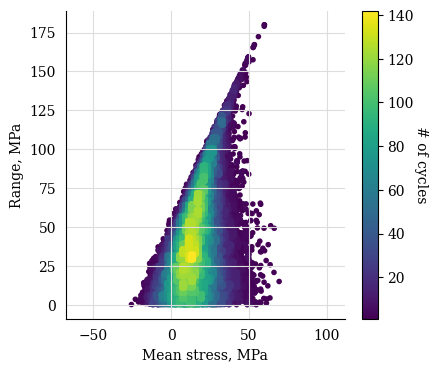

In [8]:
fig, ax = plt.subplots(1,1, figsize=(4.5, 4))
cycle_count.plot_histogram(fig=fig, plot_type="mean-range")
plt.show()

In [9]:
exp_dict = cycle_count.as_dict(
    max_consecutive_zeros=20, damage_tolerance_for_binning=1,
)
print(exp_dict)

{'nr_small_cycles': 99, 'range_bin_lower_bound': 0.2, 'range_bin_width': 3.0, 'mean_bin_lower_bound': -25.5, 'mean_bin_width': 3.0, 'hist': [[0.0, 1.0], [1.0, 1.0], [4.0, 5.0, 4.0, 1.0, 3.0], [14.0, 17.0, 9.0, 10.0, 6.0, 4.0, 0.0, 2.0, 1.0], [31.0, 31.0, 21.0, 20.0, 13.0, 10.0, 6.0, 7.0, 4.0, 5.0], [33.0, 51.0, 24.0, 39.0, 31.0, 28.0, 22.0, 15.0, 13.0, 6.0, 2.0, 3.0, 1.0], [56.0, 68.0, 63.0, 40.0, 45.0, 40.0, 36.0, 41.0, 19.0, 22.0, 18.0, 11.0, 7.0, 2.0, 1.0], [74.0, 91.0, 78.0, 60.0, 78.0, 60.0, 75.0, 46.0, 44.0, 44.0, 40.0, 20.0, 19.0, 18.0, 4.0, 2.0], [89.0, 117.0, 101.0, 101.0, 88.0, 101.0, 104.0, 84.0, 78.0, 85.0, 67.0, 52.0, 44.0, 41.0, 25.0, 20.0, 8.0, 7.0, 2.0], [110.0, 104.0, 133.0, 125.0, 116.0, 126.0, 114.0, 140.0, 106.0, 107.0, 114.0, 68.0, 79.0, 64.0, 61.0, 43.0, 27.0, 22.0, 14.0, 5.0, 6.0], [129.0, 118.0, 115.0, 145.0, 128.0, 124.0, 156.0, 165.0, 106.0, 159.0, 138.0, 119.0, 129.0, 119.0, 97.0, 91.0, 81.0, 57.0, 56.0, 26.0, 15.0, 10.0, 2.0], [106.0, 125.0, 128.0, 132.0, 15

In [10]:
cycle_count_d = pf.CycleCount.from_rainflow(exp_dict, name="Random Signal")
cycle_count_d

,Random Signal
Cycle counting object,
"largest full stress range, MPa",179.027
"largest stress range, MPa",180.0
number of full cycles,33219
number of residuals,22
number of small cycles,99
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


/tmp/ipykernel_1372810/716630449.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  marker="d", s=2, cmap=mpl.cm.get_cmap("coolwarm"))
/tmp/ipykernel_1372810/716630449.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=mpl.cm.get_cmap("coolwarm"), linewidth=0.25)


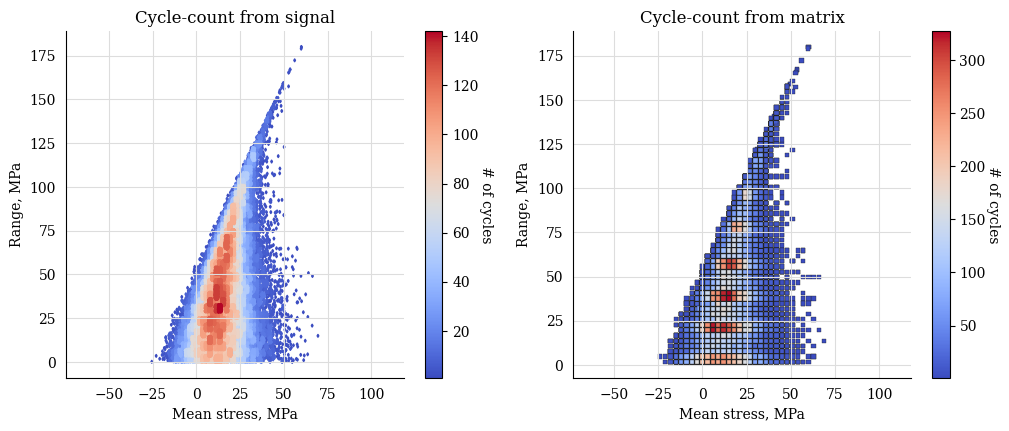

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))
cycle_count.plot_histogram(fig=fig, ax=axs[0], plot_type="mean-range",
                           marker="d", s=2, cmap=mpl.cm.get_cmap("coolwarm"))
axs[0].set_title("Cycle-count from signal")
cycle_count_d.plot_histogram(fig=fig, ax=axs[1], plot_type="mean-range",
                             marker="s", s=10, edgecolors="#222",
                             cmap=mpl.cm.get_cmap("coolwarm"), linewidth=0.25)
axs[1].set_title("Cycle-count from matrix")
plt.show()

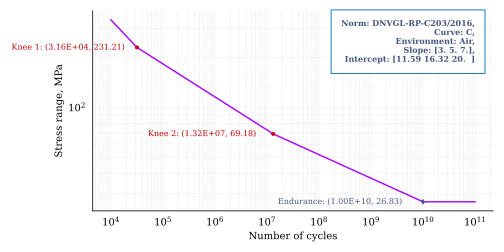

In [12]:
c_air = pf.SNCurve(
    [3, 5, 7],
    intercept=[11.592, 16.320, 20],
    endurance=1E10,
    norm="DNVGL-RP-C203/2016",
    environment='Air',
    curve='C'
)
c_air

In [13]:
plt.rcParams['figure.figsize'] = (10.5/2.514/0.7, 4.5/2.514/0.7)

plt.rcParams["font.family"] = "Serif"

plt.rcParams["font.size"] = 9.5

plt.rcParams["axes.grid"] = True

plt.rcParams['grid.color'] = "#DDDDDD"

plt.rcParams['grid.linestyle'] = "-"

plt.rcParams['axes.spines.right'] = False

plt.rcParams['axes.spines.top'] = False

plt.rcParams['lines.markersize'] = 3

plt.rcParams['xtick.bottom'] = False

plt.rcParams['xtick.labelbottom'] = True

plt.rcParams['ytick.left'] = False

plt.rcParams['ytick.labelleft'] = True

(<Figure size 596.659x255.711 with 1 Axes>,
 <Axes: xlabel='Number of cycles', ylabel='Stress range, MPa'>)

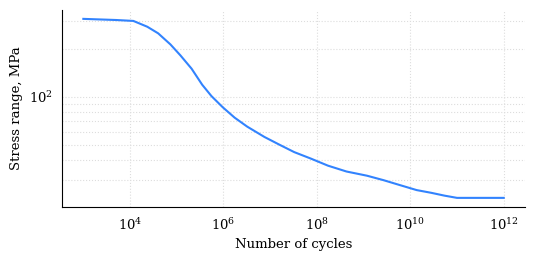

In [14]:
knee_points = """
             10, 320
          1_000, 308
          5_039, 303
         11_771, 299
         23_357, 275
         39_967, 250
         73_176, 213
        119_377, 182
        207_880, 150
        350_376, 119
        553_241, 101
        963_397,  86
      1_733_270,  74
      3_221_789,  65
      7_525_202,  56
     15_937_828,  50
     32_671_572,  45
     73_861_998,  41
    172_521_054,  37
    430_133_471,  34
  1_182_699_719,  32
  2_673_778_988,  30
  5_850_681_784,  28
 13_665_563_053,  26
 28_013_567_611,  25
 53_798_384_034,  24
121_624_268_965,  23
"""

# Convert the string data to a list of lists
knee_points_list = [list(map(float, line.split(',')))
                    for line in knee_points.strip().split('\n')]
knee_points_list = np.array(knee_points_list)

curve_fkp = pf.SNCurve.from_knee_points(
    knee_stress=knee_points_list[:,1],
    knee_cycles=knee_points_list[:,0],
    endurance=1E11,
    norm="Custom",
    curve="From Knee Points",
    environment="Interpolated",
)
curve_fkp.plot()

In [16]:
# Calculate damage for the cycle-count object
damage = pf.damage.stress_life.get_pm(cycle_count=cycle_count, sn_curve=c_air)
damage_d = pf.damage.stress_life.get_pm(cycle_count=cycle_count_d, sn_curve=c_air)
print(f"damage from signal: {sum(damage)}")
print(f"damage from matrix: {sum(damage_d)}")

damage from signal: 0.0022719568345403265
damage from matrix: 0.0022724953500665016


In [17]:
import copy

In [19]:
cycle_count_different_unit = copy.deepcopy(cycle_count)
cycle_count_different_unit.unit = "Pa"
try:
    damage = pf.damage.stress_life.get_pm(cycle_count=cycle_count_different_unit, sn_curve=c_air)
except ValueError as ve:
    print(ve)

Units of cycle_count (Pa) and sn_curve (MPa) do not match.


In [20]:

SIF = np.linspace(1,2500, 300)
SLOPE = np.array([2.88, 5.1, 8.16, 5.1, 2.88])
INTER = np.array([1E-16, 1E-20, 1E-27, 1E-19, 1E-13])
THRESHOLD = 20
CRITICAL = 2000
pc = pf.ParisCurve(slope=SLOPE, intercept=INTER, threshold=THRESHOLD,
                     critical=CRITICAL, norm="The norm",
                     environment="Environment", curve="Test")

In [21]:
pc.unit

'MPa √mm'

In [22]:
geo = pf.geometry.HollowCylinder(
    initial_depth=5.,
    thickness=10.,
    height=30.,
    outer_diameter=30.,
    width_to_depth_ratio=1.,
    crack_position="external"
)
geo

HollowCylinder(
  _id=HOL_CYL_01,
  initial_depth=5.0,
  outer_diameter=30.0,
  thickness=10.0,
  height=30.0,
  width_to_depth_ratio=1.0,
  crack_position=external,
)

(<Figure size 596.659x255.711 with 1 Axes>, <Axes: >)

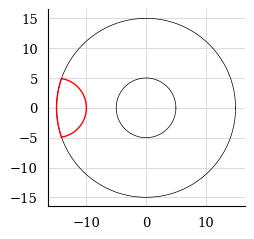

In [23]:
geo.plot()

In [24]:
pc.unit in cycle_count.unit

False

In [26]:
cg = pf.damage.crack_growth.get_crack_growth(
cycle_count, pc, geo, express_mode=False
)
print(f"Cycles to end: {int(cg.final_cycles)}")

Fatigue spectrum applied w/o failure. Stopping calculation
Cycles to end: 33328


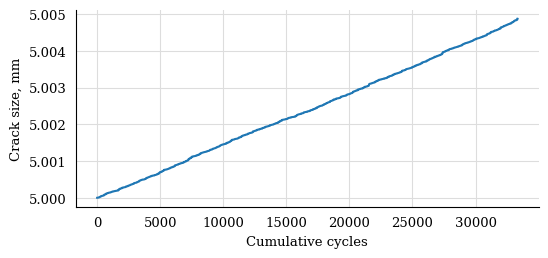

In [27]:
plt.plot(np.cumsum(cg.count_cycle), cg.crack_depth)
plt.xlabel("Cumulative cycles")
plt.ylabel("Crack size, mm")
plt.show()

In [28]:
cg_d = pf.damage.crack_growth.get_crack_growth(
    cycle_count_d, pc, geo, express_mode=True
)
print(f"Cycles to end: {int(cg.final_cycles)}")

Fatigue spectrum applied w/o failure. Stopping calculation
Cycles to end: 33328


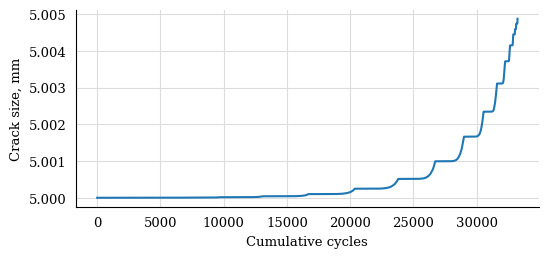

In [29]:
plt.plot(np.cumsum(cg_d.count_cycle), cg_d.crack_depth)
plt.xlabel("Cumulative cycles")
plt.ylabel("Crack size, mm")
plt.show()

### Working with pandas DataFrames

In [30]:
df = cycle_count_d.to_df()

In [31]:
df._metadata

{'name': 'Random Signal',
 'timestamp': datetime.datetime(2025, 2, 21, 14, 58, 5, 5893, tzinfo=datetime.timezone.utc),
 'time_sequence': array([datetime.datetime(2025, 2, 21, 14, 58, 5, 5893, tzinfo=datetime.timezone.utc)],
       dtype=object),
 'residuals_sequence': array([ 49.8674, -15.0853,  61.0853, -22.767 ,  90.188 , -25.622 ,
         98.1066, -27.3924, 110.2141, -28.5645, 111.0029, -29.8464,
        129.1926, -29.9283, 137.157 , -30.    , 150.    , -29.8804,
         92.4207, -22.7267,  36.1864, -17.5756,  14.3128,  14.2784]),
 'mean_stress_corrected': 'No',
 'stress_concentration_factor': 1.0,
 'nr_small_cycles': 99,
 'lffd_solved': False,
 'unit': 'MPa'}

In [32]:
# df.cg.calc_growth(cg_curve=pc, crack_geometry=geo)

In [33]:
df.miner.damage(sn_curve=c_air)

,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage
0,1.0,-24.0000,4.7000,inf,0.000000e+00
1,1.0,-21.0000,1.7000,inf,0.000000e+00
2,1.0,-21.0000,4.7000,inf,0.000000e+00
3,4.0,-18.0000,1.7000,inf,0.000000e+00
4,5.0,-18.0000,4.7000,inf,0.000000e+00
...,...,...,...,...,...
728,0.5,31.2702,122.3010,7.635719e+05,6.548171e-07
729,0.5,34.8470,115.1474,1.032118e+06,4.844408e-07
730,0.5,6.7298,58.9131,4.059914e+07,1.231553e-08
731,0.5,9.3054,53.7620,7.703216e+07,6.490795e-09


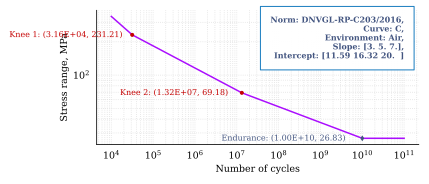

In [34]:
df.sn_curve

In [35]:
df.count_cycle.max()

180.0

(<Figure size 596.659x255.711 with 2 Axes>,
 <Axes: xlabel='# of cycles', ylabel='Stress range, MPa'>)

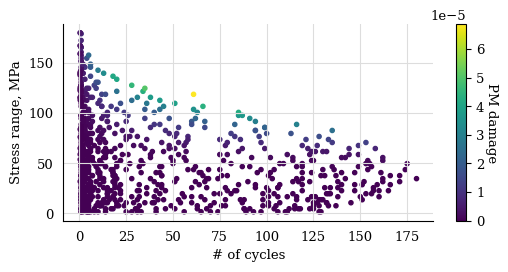

In [36]:
df.miner.plot_histogram()

In [37]:
geo

HollowCylinder(
  _id=HOL_CYL_01,
  initial_depth=5.0,
  outer_diameter=30.0,
  thickness=10.0,
  height=30.0,
  width_to_depth_ratio=1.0,
  crack_position=external,
)

In [38]:
try:
    df.cg.calc_growth(cg_curve=pc, crack_geometry=geo)
except AttributeError:
    print(df)

Fatigue spectrum applied w/o failure. Stopping calculation


<Axes: xlabel='cumul_cycle', ylabel='crack_depth'>

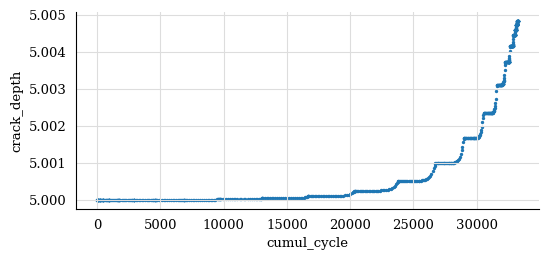

In [39]:
df.plot(kind="scatter", x="cumul_cycle", y="crack_depth", s=2)

In [40]:
df

,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage,crack_depth,sif,cumul_cycle,geometry_factor
0,1.0,-24.0000,4.7000,inf,0.000000e+00,5.000000,17.818187,1.0,0.956546
1,1.0,-21.0000,1.7000,inf,0.000000e+00,5.000000,6.444876,2.0,0.956546
2,1.0,-21.0000,4.7000,inf,0.000000e+00,5.000000,17.818187,3.0,0.956546
3,4.0,-18.0000,1.7000,inf,0.000000e+00,5.000000,6.444876,7.0,0.956546
4,5.0,-18.0000,4.7000,inf,0.000000e+00,5.000000,17.818187,12.0,0.956546
...,...,...,...,...,...,...,...,...,...
728,0.5,31.2702,122.3010,7.635719e+05,6.548171e-07,5.004824,526.540167,33223.5,0.956841
729,0.5,34.8470,115.1474,1.032118e+06,4.844408e-07,5.004824,526.540167,33223.5,0.956841
730,0.5,6.7298,58.9131,4.059914e+07,1.231553e-08,5.004827,529.533253,33224.0,0.956841
731,0.5,9.3054,53.7620,7.703216e+07,6.490795e-09,5.004827,529.533253,33224.0,0.956841


In [41]:
sn = pf.SNCurve(slope=3., intercept=15)

In [42]:
df.gassner.g(sn_curve=sn)

,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage,crack_depth,sif,cumul_cycle,geometry_factor,shift_factor
0,1.0,-24.0000,4.7000,inf,0.000000e+00,5.000000,17.818187,1.0,0.956546,5.357297e-10
1,1.0,-21.0000,1.7000,inf,0.000000e+00,5.000000,6.444876,2.0,0.956546,2.535122e-11
2,1.0,-21.0000,4.7000,inf,0.000000e+00,5.000000,17.818187,3.0,0.956546,5.357297e-10
3,4.0,-18.0000,1.7000,inf,0.000000e+00,5.000000,6.444876,7.0,0.956546,1.014049e-10
4,5.0,-18.0000,4.7000,inf,0.000000e+00,5.000000,17.818187,12.0,0.956546,2.678648e-09
...,...,...,...,...,...,...,...,...,...,...
728,0.5,31.2702,122.3010,7.635719e+05,6.548171e-07,5.004824,526.540167,33223.5,0.956841,4.719676e-06
729,0.5,34.8470,115.1474,1.032118e+06,4.844408e-07,5.004824,526.540167,33223.5,0.956841,3.938987e-06
730,0.5,6.7298,58.9131,4.059914e+07,1.231553e-08,5.004827,529.533253,33224.0,0.956841,5.275429e-07
731,0.5,9.3054,53.7620,7.703216e+07,6.490795e-09,5.004827,529.533253,33224.0,0.956841,4.009114e-07


(<Figure size 596.659x255.711 with 1 Axes>, <Axes: >)

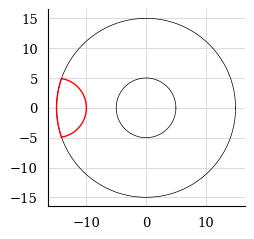

In [43]:
df.crack_geometry.plot()

In [44]:
df._metadata

{'name': 'Random Signal',
 'timestamp': datetime.datetime(2025, 2, 21, 14, 58, 5, 5893, tzinfo=datetime.timezone.utc),
 'time_sequence': array([datetime.datetime(2025, 2, 21, 14, 58, 5, 5893, tzinfo=datetime.timezone.utc)],
       dtype=object),
 'residuals_sequence': array([ 49.8674, -15.0853,  61.0853, -22.767 ,  90.188 , -25.622 ,
         98.1066, -27.3924, 110.2141, -28.5645, 111.0029, -29.8464,
        129.1926, -29.9283, 137.157 , -30.    , 150.    , -29.8804,
         92.4207, -22.7267,  36.1864, -17.5756,  14.3128,  14.2784]),
 'mean_stress_corrected': 'No',
 'stress_concentration_factor': 1.0,
 'nr_small_cycles': 99,
 'lffd_solved': False,
 'unit': 'MPa'}

In [45]:
df.shift_factor.sum()

0.03106090587510503

In [47]:
cc_clustered = pf.CycleCount(
    count_cycle=np.ones(50000),
    stress_range=np.ones(50000),
    mean_stress=np.zeros(50000),
)

scf = 1000.
initial_depth = 9.0
slope = 3.1
intercept = 1.2e-14

cc_clustered = cc_clustered * scf
threshold = scf * np.sqrt(np.pi * initial_depth)
paris_threshold = pf.ParisCurve(
    slope=slope, intercept=intercept, threshold=1.01 * threshold
)
paris_critical = pf.ParisCurve(
    slope=slope, intercept=intercept, critical=1.2 * threshold
)
paris_pure = pf.ParisCurve(slope=slope, intercept=intercept)

# fmt: off
analytical = 2 / (2 - slope) / intercept * np.pi ** (-slope / 2) \
    * scf ** (-slope) * (-(initial_depth ** (1 - slope / 2)))

geo = pf.geometry.InfiniteSurface(initial_depth=initial_depth)
# fmt: on

cg_th = pf.damage.crack_growth.get_crack_growth(
    cc_clustered, paris_threshold, geo, express_mode=True
)
cg_cr = pf.damage.crack_growth.get_crack_growth(
    cc_clustered, paris_critical, geo, express_mode=True
)
cg = pf.damage.crack_growth.get_crack_growth(
    cc_clustered, paris_pure, geo, express_mode=True
)

Fatigue spectrum applied w/o failure. Stopping calculation
Critical SIF reached. Stopping calculation.
Crack size increased by more than 10x in the last iteration. Stopping calculation.


In [48]:
cg_th.get_knees_sif

array([5370.53516771,           inf])

In [49]:
cg.get_knees_sif

array([ 0., inf])

In [50]:
cg_cr.get_knees_sif

array([   0.       , 6380.8338639])

In [51]:
cg_cr.sif

array([5317.36155272, 5318.61819541, 5319.8754618 , 5321.13335236,
       5322.39186757, 5323.6510079 , 5324.91077381, 5326.17116579,
       5327.43218431, 5328.69382985, 5329.95610287, 5331.21900385,
       5332.48253328, 5333.74669162, 5335.01147936, 5336.27689696,
       5337.54294492, 5338.8096237 , 5340.0769338 , 5341.34487567,
       5342.61344982, 5343.88265671, 5345.15249683, 5346.42297066,
       5347.69407868, 5348.96582137, 5350.23819922, 5351.51121272,
       5352.78486233, 5354.05914856, 5355.33407187, 5356.60963277,
       5357.88583173, 5359.16266925, 5360.4401458 , 5361.71826188,
       5362.99701797, 5364.27641456, 5365.55645215, 5366.83713121,
       5368.11845225, 5369.40041574, 5370.68302219, 5371.96627208,
       5373.25016591, 5374.53470416, 5375.81988734, 5377.10571592,
       5378.39219042, 5379.67931132, 5380.96707912, 5382.25549431,
       5383.54455738, 5384.83426885, 5386.12462919, 5387.41563892,
       5388.70729853, 5389.99960851, 5391.29256936, 5392.58618

In [52]:
cg_cr.crack_depth

array([ 9.        ,  9.00425441,  9.00851194,  9.01277259,  9.01703636,
        9.02130326,  9.02557329,  9.02984646,  9.03412275,  9.03840219,
        9.04268478,  9.0469705 ,  9.05125938,  9.05555141,  9.05984659,
        9.06414493,  9.06844643,  9.0727511 ,  9.07705893,  9.08136994,
        9.08568412,  9.09000147,  9.09432201,  9.09864573,  9.10297264,
        9.10730273,  9.11163602,  9.11597251,  9.12031219,  9.12465508,
        9.12900117,  9.13335048,  9.13770299,  9.14205872,  9.14641767,
        9.15077984,  9.15514524,  9.15951386,  9.16388572,  9.16826081,
        9.17263913,  9.1770207 ,  9.18140552,  9.18579358,  9.19018489,
        9.19457946,  9.19897729,  9.20337837,  9.20778272,  9.21219034,
        9.21660123,  9.22101539,  9.22543283,  9.22985355,  9.23427755,
        9.23870484,  9.24313543,  9.2475693 ,  9.25200647,  9.25644695,
        9.26089072,  9.26533781,  9.2697882 ,  9.27424191,  9.27869894,
        9.28315928,  9.28762295,  9.29208995,  9.29656027,  9.30